<a href="https://colab.research.google.com/github/Mino94/HunTon777/blob/master/%5BSection1%5DAI_1%EA%B8%B0%EA%B9%80%EB%AF%BC%ED%98%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section1 Project - AI 1기 김민호


## **다음 분기에 어떤 게임을 설계해야 할까**

data url : https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv

**Data Description**
- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미 매출액입니다.
- EU_Sales : 유럽 매출액입니다.
- JP_Sales : 일본 매출액입니다.
- Other_Sales : 기타지역 매출액입니다.

## **EDA(탐색적 데이터 분석)**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import matplotlib as mpl
import numpy as np

# 한글 설정
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

mpl.rc('font', family='NanumBarunGothic')


In [3]:
url = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv"

df = pd.read_csv(url)
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop_duplicates() # 중복 행 제거

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
# df['Year'] column .0 제거 연도만 나오게 데이터 포멧
df['Year'] = pd.to_datetime(df['Year'], format='%Y%m%d', errors='ignore')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16597 non-null  object
 1   Platform     16597 non-null  object
 2   Year         16327 non-null  object
 3   Genre        16547 non-null  object
 4   Publisher    16539 non-null  object
 5   NA_Sales     16597 non-null  object
 6   EU_Sales     16597 non-null  object
 7   JP_Sales     16597 non-null  object
 8   Other_Sales  16597 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


In [7]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

* **각 나라별 Sales 기본 단위 M으로 통합 (M은 생략)**

In [8]:
def value_to_float(x):
  if type(x) == float or type(x) == int:
        return x
  if 'K' in x:
      if len(x) > 1:
          return float(x.replace('K', '')) * 0.001
  if 'M' in x:
      if len(x) > 1:
          return float(x.replace('M', ''))
  return x

In [9]:
df['NA_Sales'] = df['NA_Sales'].apply(value_to_float)
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float)
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float)
df['Other_Sales'] = df['Other_Sales'].apply(value_to_float)

* **Year에 80보다 작은부분에 데이터 공통점은 2000년도 출시일이지만 누락되 추가하였다.**

* **80이상 100이하의 값은 1900년도 출시일이어서 1900을 더했다.**

In [10]:
res = df['Year'] < 80
res1 = (80 <= df['Year']) & (df['Year']< 100)
print( df.loc[res, 'Year'])
print(df.loc[res1, 'Year'])
df.loc[res, 'Year'] = df.loc[res, 'Year']  + 2000
df.loc[res1, 'Year'] = df.loc[res1, 'Year']  + 1900

74        9
213      11
304      15
768       3
1015      9
         ..
15612     2
15836    15
16103     8
16149     8
16394     0
Name: Year, Length: 86, dtype: object
81       97
906      96
2429     96
3492     98
4365     86
4807     95
4839     95
10315    97
10705    96
11334    95
14572    98
14785    95
15985    94
16482    98
Name: Year, dtype: object


In [11]:
df['Year'].sort_values()
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'])
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'])
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16327 non-null  object 
 3   Genre        16547 non-null  object 
 4   Publisher    16539 non-null  object 
 5   NA_Sales     16597 non-null  float64
 6   EU_Sales     16597 non-null  float64
 7   JP_Sales     16597 non-null  float64
 8   Other_Sales  16597 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.3+ MB


### 결측값 확인

In [12]:
df.isnull().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

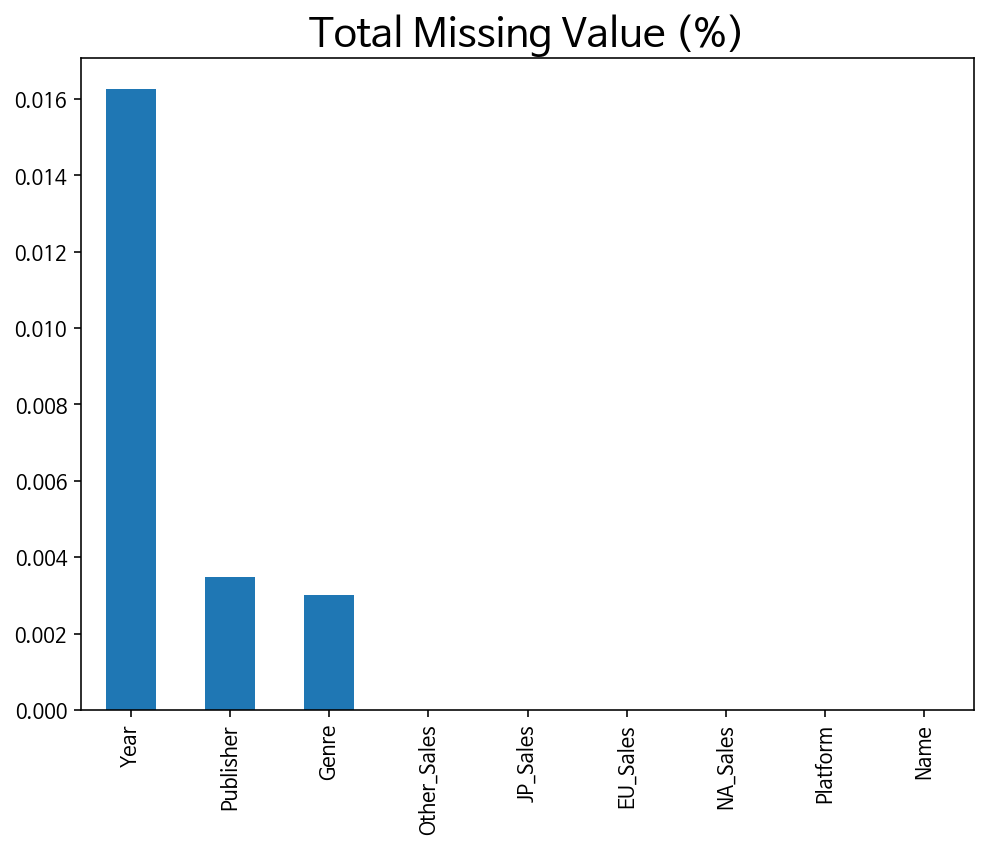

In [13]:
# 결측치 비율 확인
# 결측치의 비율이 0.02 % 이하다. 데이터 입력시 누락 되었을 가능성이 높다.
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)
plt.show();

 **결측치 비율이 0.02퍼도 안되기 때문에 하나라도 결측지가 있으면 해당 행 삭제**

 **Year, Genre, Platform 을 예측 및 판단 할 수 없어 결측지를 배제하고 데이터 분석을 진행한다.** 

In [14]:
df = df.dropna(how='any')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [15]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [16]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## **Feature Engineering**

In [17]:
# World Sales 추가
df['World_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,World_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


## **Feture간의 유사성 파악**

1) Genre와 Platform의 연관성을 확인
-> chi-square 검증을 통해 확인

*   H0 : Genre와 Platform의 Feature 데이터는 연관이 없다.
*   H1 : Genre와 Platform의 Feature 데이터는 연관이 있다.
*   신뢰구간 : 95%



In [18]:
gp_df = df[['Genre','Platform']]
gp_df.head()

,Genre,Platform
0,Action,DS
1,Action,Wii
2,Adventure,PSP
3,Misc,DS
4,Platform,PS3


In [19]:
gp_df = pd.crosstab(gp_df['Platform'],gp_df['Genre'])
gp_df.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,55,1,1,5,9,8,4,0,22,1,9,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,180,36,14,53,28,19,10,84,6,28,25,15
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,335,237,36,388,89,235,66,196,42,279,146,78


In [20]:
from scipy.stats import chi2_contingency

chi2_contingency(gp_df, correction = False)

(5820.019068400997,
 0.0,
 330,
 array([[2.29419371e+01, 8.97851118e+00, 5.91250539e+00, 1.19029001e+01,
         6.18157749e+00, 4.00775814e+00, 8.63154978e+00, 1.03734376e+01,
         9.06348131e+00, 5.99039468e+00, 1.62788621e+01, 4.73708515e+00],
        [5.98485315e-01, 2.34222031e-01, 1.54239271e-01, 3.10510437e-01,
         1.61258543e-01, 1.04550212e-01, 2.25170864e-01, 2.70611416e-01,
         2.36438643e-01, 1.56271166e-01, 4.24665969e-01, 1.23576134e-01],
        [9.93485623e+01, 3.88808571e+01, 2.56037190e+01, 5.15447325e+01,
         2.67689182e+01, 1.73553353e+01, 3.73783634e+01, 4.49214950e+01,
         3.92488147e+01, 2.59410135e+01, 7.04945508e+01, 2.05136383e+01],
        [1.03737455e+01, 4.05984853e+00, 2.67348070e+00, 5.38218090e+00,
         2.79514808e+00, 1.81220368e+00, 3.90296164e+00, 4.69059787e+00,
         4.09826981e+00, 2.70870020e+00, 7.36087679e+00, 2.14198633e+00],
        [4.24326088e+02, 1.66063420e+02, 1.09355643e+02, 2.20151900e+02,
         1.1433

 pvalue = 0.0 이 나왔다. 이는, 0.5 이하의 값으로 귀무 가설을 기각 한다. 

**Genre와 Platform의 Feature 데이터는 연관이 있다.**

Publisher와 Genre의 관계
-> chi-square 검증을 통해 확인

*   H0 : Publisher와 Genre의 Feature 데이터는 연관이 없다.
*   H1 : Publisher와 Genre의 Feature 데이터는 연관이 있다.
*   신뢰구간 : 95%

In [21]:
pg_df = df[['Publisher','Genre']]
pg_df = pd.crosstab(pg_df['Genre'],pg_df['Publisher'])
pg_df.head()

Publisher,10TACLE Studios,1C Company,20th Century Fox Video Games,2D Boy,3DO,49Games,505 Games,5pb,7G//AMES,989 Sports,989 Studios,AQ Interactive,ASC Games,ASCII Entertainment,ASCII Media Works,ASK,Abylight,Acclaim Entertainment,Accolade,Ackkstudios,Acquire,Activision,Activision Blizzard,Activision Value,Adeline Software,Aerosoft,Agatsuma Entertainment,Agetec,Aksys Games,Alawar Entertainment,Alchemist,Alternative Software,Altron,Alvion,American Softworks,Angel Studios,Answer Software,Aqua Plus,Aques,Arc System Works,...,Victor Interactive,Video System,Views,Vir2L Studios,Virgin Interactive,Virtual Play Games,Visco,Vivendi Games,Wanadoo,Warashi,Wargaming.net,Warner Bros. Interactive Entertainment,Warp,WayForward Technologies,Westwood Studios,White Park Bay Software,Wizard Video Games,XS Games,Xicat Interactive,Xing Entertainment,Xplosiv,Xseed Games,Yacht Club Games,Yamasa Entertainment,Yeti,Yuke's,Yumedia,Zenrin,Zoo Digital Publishing,Zoo Games,Zushi Games,bitComposer Games,dramatic create,fonfun,iWin,id Software,imageepoch Inc.,inXile Entertainment,"mixi, Inc",responDESIGN
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,0,0,4,0,17,0,21,5,0,0,2,0,1,0,0,0,1,14,0,4,2,307,1,1,1,0,1,2,1,1,3,1,0,0,1,0,1,0,0,3,...,0,1,1,1,11,0,0,43,2,0,0,150,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,8,3,1,0,1,0,0,0,0,0,1,0
Adventure,1,0,0,0,3,0,7,49,0,0,0,0,0,2,7,0,0,4,0,1,2,25,0,0,0,0,0,0,3,0,32,0,0,0,0,0,0,13,0,10,...,1,0,1,0,1,0,0,7,0,0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,9,0,1,0,7,1,1,0,4,0,0,0,1,0,0,0
Fighting,0,0,0,0,1,0,11,1,0,0,0,2,0,0,0,0,0,31,0,0,0,7,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,7,...,0,0,0,0,19,0,0,4,0,0,0,11,0,0,0,0,0,0,0,1,0,0,0,0,1,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0
Misc,0,0,0,0,0,0,31,0,1,0,0,3,0,2,0,1,0,5,0,0,0,103,0,1,0,0,1,1,0,0,4,0,0,2,0,0,0,5,0,1,...,1,0,0,0,1,1,0,8,0,0,0,22,0,0,0,0,0,2,0,0,3,0,0,2,0,0,0,2,18,11,1,0,0,0,0,0,0,0,0,0
Platform,0,0,0,0,1,0,6,0,0,0,0,0,0,0,0,0,0,5,1,0,0,60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,0,0,37,2,0,0,8,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0


In [22]:
chi2_contingency(pg_df, correction = False)


(25182.543629434065,
 0.0,
 6314,
 array([[0.59848531, 0.59848531, 0.99747552, ..., 0.1994951 , 0.1994951 ,
         0.39899021],
        [0.23422203, 0.23422203, 0.39037005, ..., 0.07807401, 0.07807401,
         0.15614802],
        [0.15423927, 0.15423927, 0.25706545, ..., 0.05141309, 0.05141309,
         0.10282618],
        ...,
        [0.15627117, 0.15627117, 0.26045194, ..., 0.05209039, 0.05209039,
         0.10418078],
        [0.42466597, 0.42466597, 0.70777661, ..., 0.14155532, 0.14155532,
         0.28311065],
        [0.12357613, 0.12357613, 0.20596022, ..., 0.04119204, 0.04119204,
         0.08238409]]))

pvalue = 0.0 이 나왔다. 이는, 0.5 이하의 값으록 귀무 가설을 기각 한다.

**Publisher와 Genre의 Feature 데이터는 연관이 있다.**

---


**2)Genre의 따라서 각 나라별 Sales의 Feature 데이터가 얼마나 영향이 있는지 알아본다.**
-> ANOVA 를 통해 확인

*   H0 : Genre의 따라서 각 나라별 Sales의 Feature 데이터는 영향이 없다.
*   H1 : Genre의 따라서 각 나라별 Sales의 Feature 데이터는 영향이 있다.
*   신뢰구간 : 95%



In [23]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats

# 미국 판매와 대표적인 장르데이터를 비교
a = df[df['Genre']=='Action']['NA_Sales']
b = df[df['Genre']=='Adventure']['NA_Sales']
c = df[df['Genre']=='Sports']['NA_Sales']
d = df[df['Genre']=='Misc']['NA_Sales']
d = df[df['Genre']=='Fighting']['NA_Sales']
d = df[df['Genre']=='Platform']['NA_Sales']

f_statistic, pVal = stats.f_oneway(a,b,c,d)

print('데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(f_statistic, pVal))
if pVal > 0.05:
    print('p-value가 0.05 보다 크기 때문에 통계적으로 관련이 없다.')
else:
    print('p-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
print('장르가 매출과 연관이 있다.')

데이터의 일원분산분석 결과 : F=43.8, p=0.00000
p-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
장르가 매출과 연관이 있다.


**Genre의 따라서 각 나라별 Sales의 Feature 데이터는 영향이 있다.**

3) Platform의 따라서 각 나라별 Sales의 Feature 데이터가 얼마나 영향이 있는지 알아본다.
-> ANOVA 를 통해 확인

*   H0 : Platform의 따라서 각 나라별 Sales의 Feature 데이터는 영향이 없다.
*   H1 : Platform의 따라서 각 나라별 Sales의 Feature 데이터는 영향이 있다.
*   신뢰구간 : 95%



In [24]:
df['Platform']

0         DS
1        Wii
2        PSP
3         DS
4        PS3
        ... 
16593     GC
16594    PSP
16595    PS3
16596    PSV
16597     PS
Name: Platform, Length: 16241, dtype: object

In [25]:
# 미국 판매와 대표적인 플랫폼을 비교
a = df[df['Platform']=='DS']['NA_Sales']
b = df[df['Platform']=='Wii']['NA_Sales']
c = df[df['Platform']=='PSP']['NA_Sales']
d = df[df['Platform']=='PS3']['NA_Sales']
d = df[df['Platform']=='PSV']['NA_Sales']
d = df[df['Platform']=='GC']['NA_Sales']

f_statistic, pVal = stats.f_oneway(a,b,c,d)

print('데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(f_statistic, pVal))
if pVal > 0.05:
    print('p-value가 0.05 보다 크기 때문에 통계적으로 관련이 없다.')
else:
    print('p-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
print('플랫폼은 매출과 연관이 있다.')

데이터의 일원분산분석 결과 : F=26.0, p=0.00000
p-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
플랫폼은 매출과 연관이 있다.


**Platform의 따라서 각 나라별 Sales의 Feature 데이터는 영향이 있다.**

=> **Genre, Platform, Publisher 데이터는 연관이 있고 Genre, Platform, Publisher에 따라서 매출에 영향이 있다. 연관성을 기억하고 아래 시각화를 통해서 좀 더 직관적으로 데이터를 분석하겠다.**

## **Data Visualization**

1. **지역에 따라서 선호하는 게임 장르**
2. **연도별 게임의 트렌드**
3. **매출이 높은 게임에 대한 분석 및 시각화 프로세스**

### 1) **각 나라에 따라서 선호하는 게임 장르가 다를까** 

In [26]:
gl = df[['Genre', 'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]
gl = gl.groupby(['Genre']).sum()


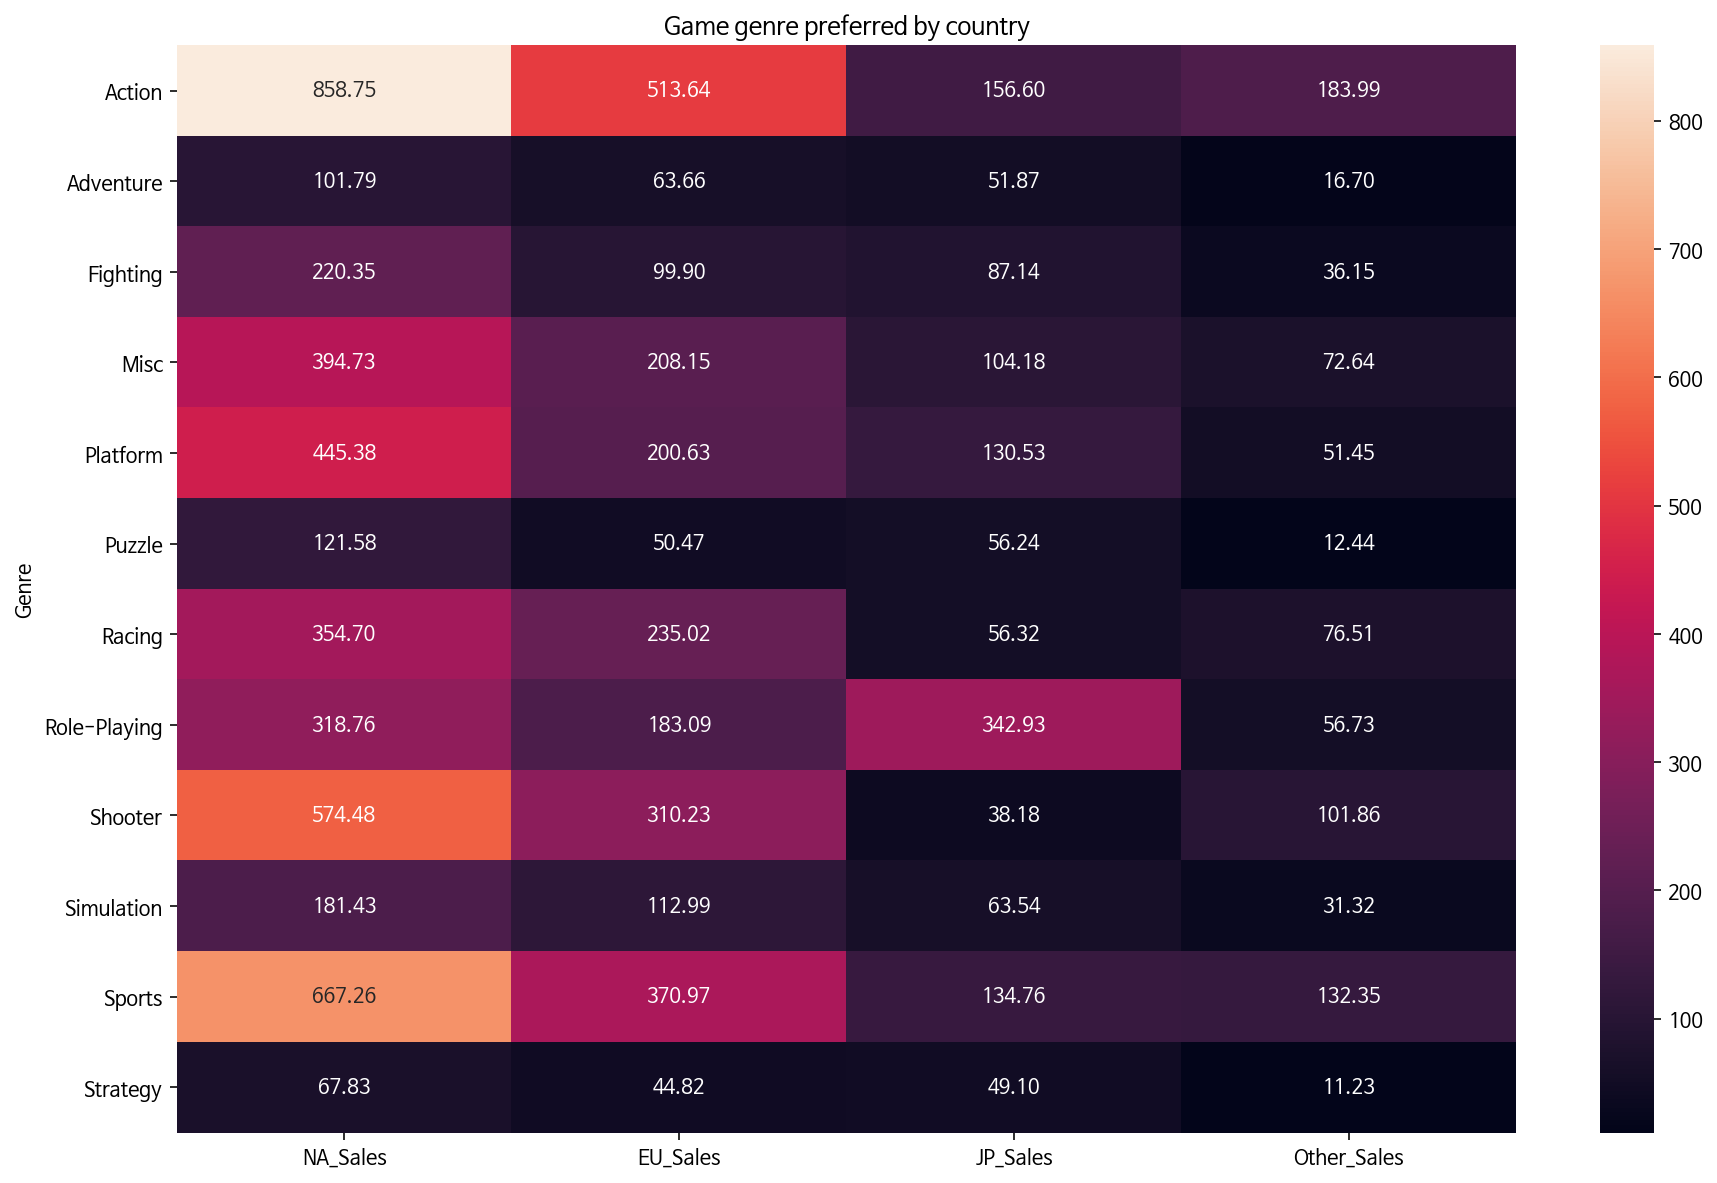

In [27]:
plt.figure(figsize=(15, 10))
sns.heatmap(gl,annot=True, fmt='.2f')
plt.title("Game genre preferred by country")
plt.show();

히트맵 그래프를 보면 

- 미국에서 Action,Sports,Shooter 장르 게임을 선호
- 유럽에서는 Action, Sports 장르 게임 선호
- 일본에서는 Role-Playing의 장르 게임 선호
- 다른 지역은 Action, Sports 순의 장르 게임 선호

---

### 2) **연도별 게임의 트렌드**

#### **연도별 게임 출시**

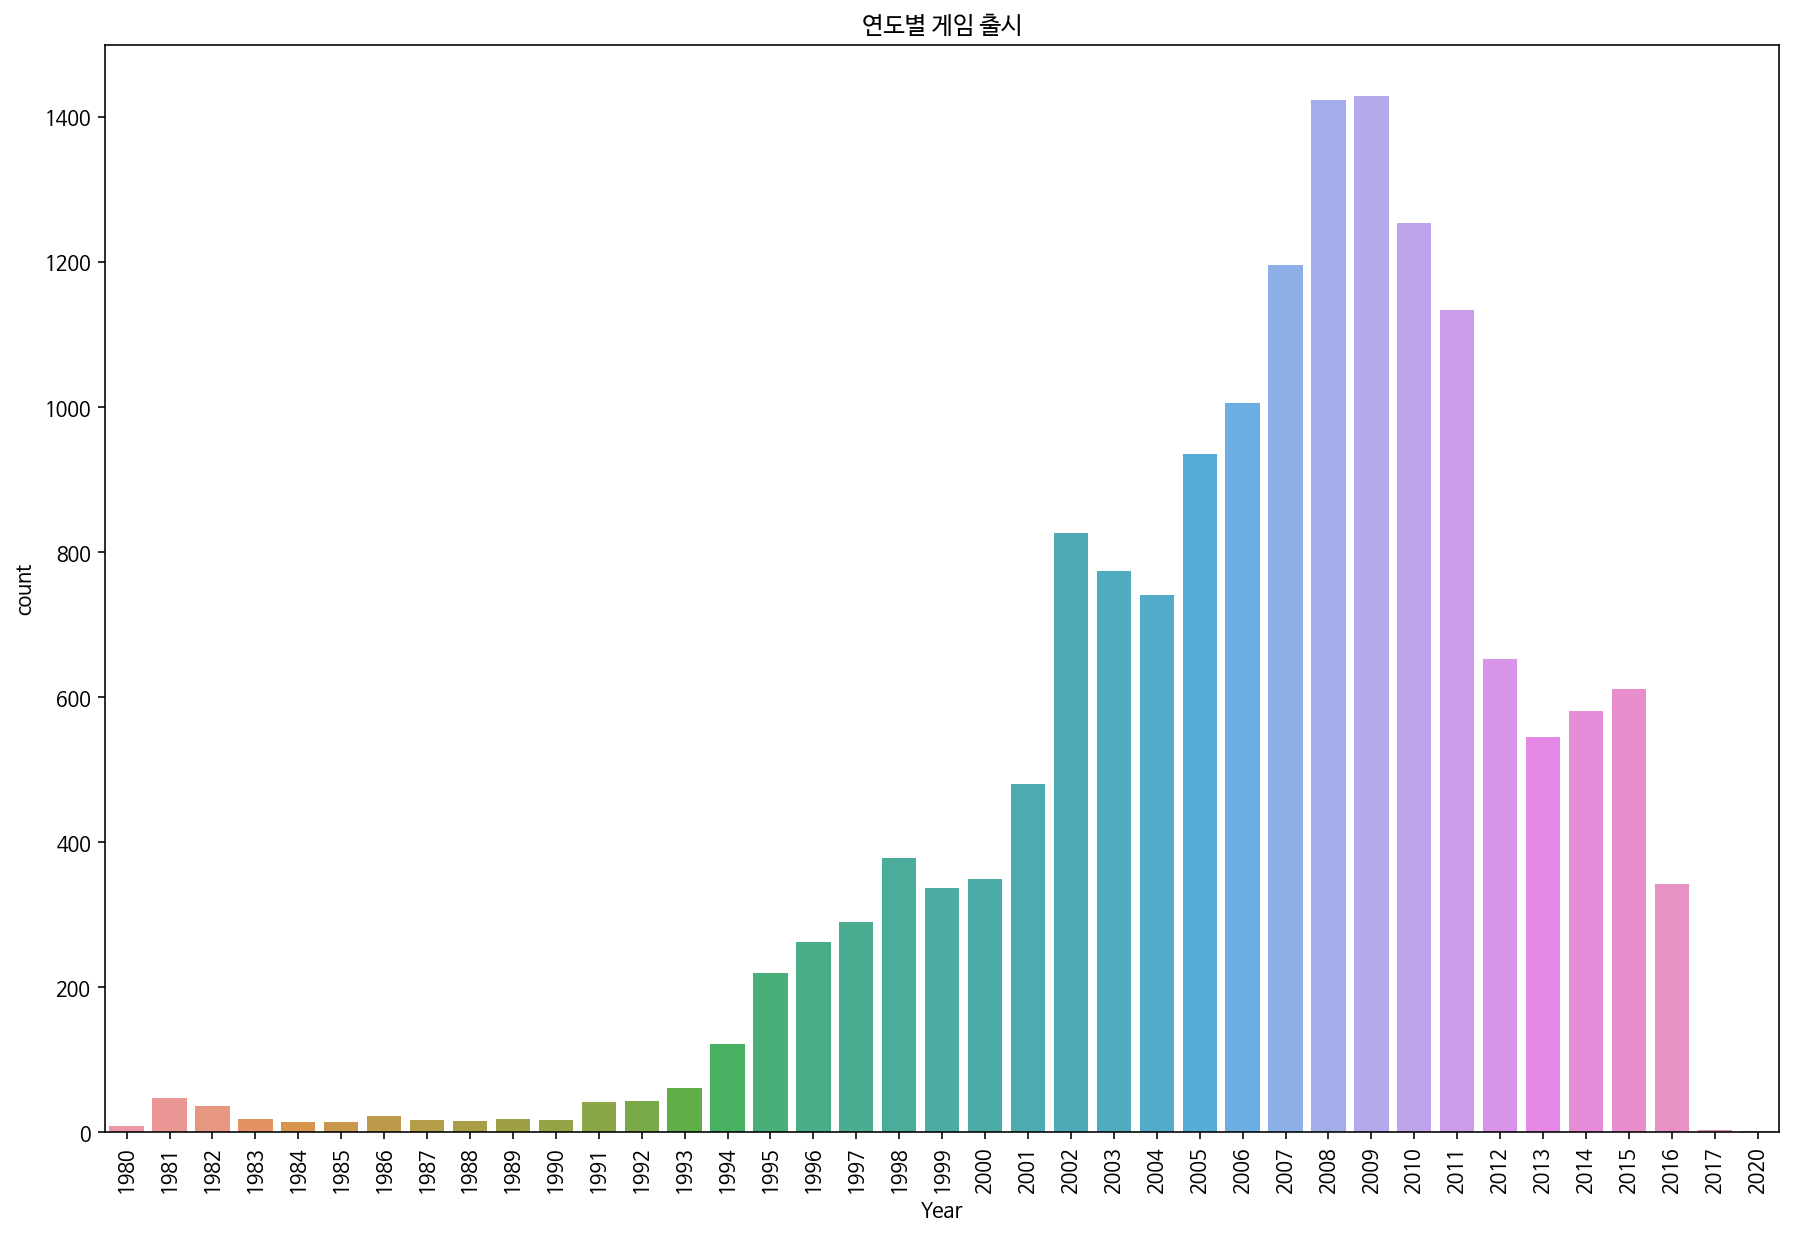

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(x="Year", data=df, order = df.groupby(['Year'])['Name'].count().index)
plt.xticks(rotation=90)
plt.title("연도별 게임 출시")
plt.show();

2007년 부터 2011년까지 비디오 게임이 가장 많이 출시 되었다.

#### 연도별 장르의 글로벌 판매량

장르의 변화를 글로벌 판매량을 통해 확인

In [29]:
action = df[df['Genre']=='Action'][['World_Sales','Year']].groupby('Year')['World_Sales'].sum().sort_index()
sports = df[df['Genre']=='Sports'][['World_Sales', 'Year']].groupby('Year')['World_Sales'].sum().sort_index()
shooter = df[df['Genre']=='Shooter'][['World_Sales', 'Year']].groupby('Year')['World_Sales'].sum().sort_index()
adventure = df[df['Genre']=='Adventure'][['World_Sales', 'Year']].groupby('Year')['World_Sales'].sum().sort_index()
racing = df[df['Genre']=='Racing'][['World_Sales', 'Year']].groupby('Year')['World_Sales'].sum().sort_index()
role_playing = df[df['Genre']=='Role-Playing'][['World_Sales', 'Year']].groupby('Year')['World_Sales'].sum().sort_index()

In [30]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=action.index, y=action.values,
                    mode='lines+markers',
                    name='Action'))
fig.add_trace(go.Scatter(x=sports.index, y=sports.values,
                    mode='lines+markers',
                    name='Sports'))
fig.add_trace(go.Scatter(x=shooter.index, y=shooter.values,
                    mode='lines+markers',
                    name='Shooter'))
fig.add_trace(go.Scatter(x=adventure.index, y=adventure.values,
                    mode='lines+markers',
                    name='Adventure'))
fig.add_trace(go.Scatter(x=racing.index, y=racing.values,
                    mode='lines+markers',
                    name='Racing'))
fig.add_trace(go.Scatter(x=role_playing.index, y=role_playing.values,
                    mode='lines+markers',
                    name='Role-Playing'))

fig.update_layout(title=' 장르 글로벌 판매',
                   xaxis_title='Year',
                   yaxis_title='장르 별 매출')

#### 연도별 플랫폼의 글로벌 판매량

연도별로 플랫폼 선호도를 파악

In [31]:
# 최신 연도별 플랫폼 출시일
df[['Platform', 'Year']].sort_values(by=['Year'])

,Platform,Year
14264,2600,1980
5723,2600,1980
15012,2600,1980
9226,2600,1980
13133,2600,1980
...,...,...
7129,PS3,2016
10107,PS4,2017
5310,PSV,2017
15233,PSV,2017


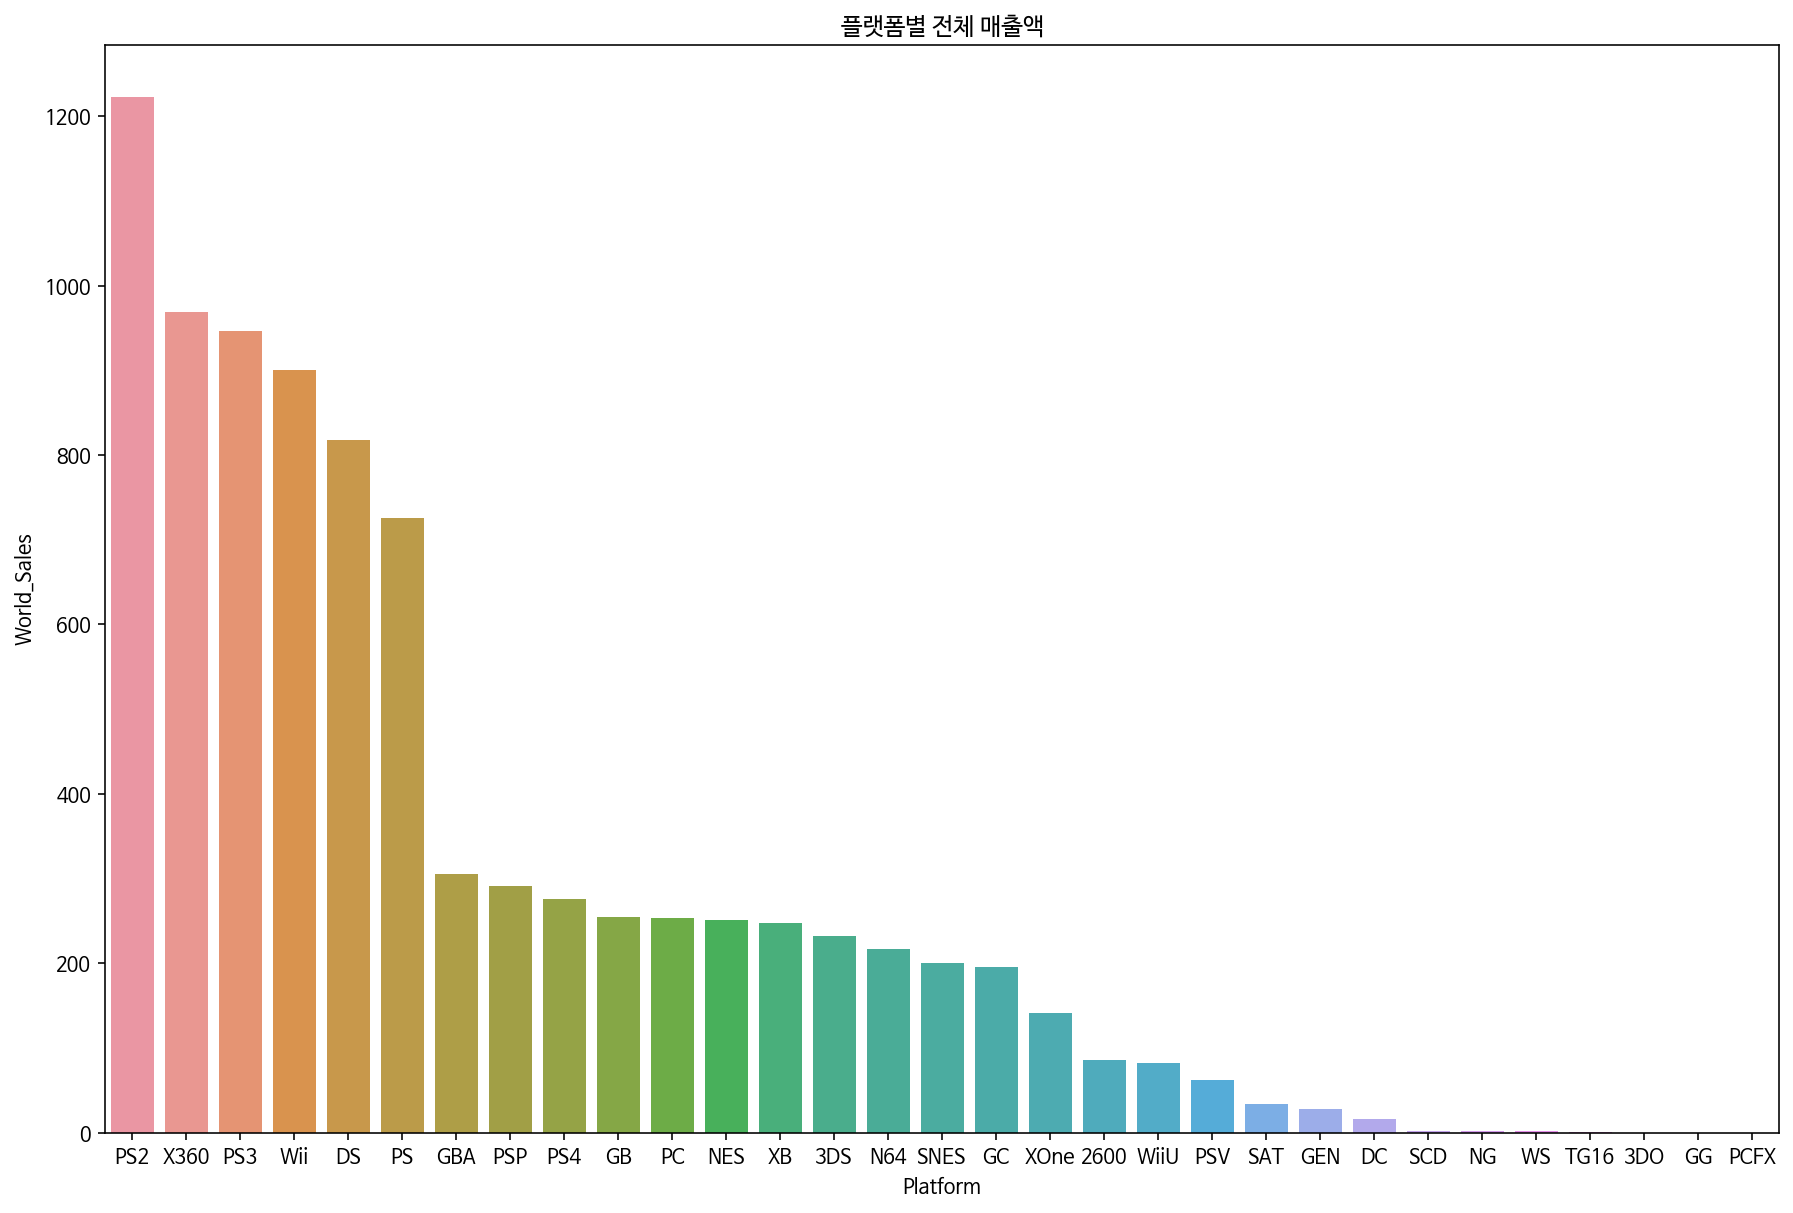

In [32]:
df_platform = df.groupby(by=['Platform'])['World_Sales'].sum()
df_platform = df_platform.reset_index()
df_platform = df_platform.sort_values(['World_Sales'], ascending=False)
# df_platform
plt.figure(figsize=(15,10))
sns.barplot('Platform', 'World_Sales', data=df_platform)
plt.title("플랫폼별 전체 매출액")
plt.show();

In [42]:
ps2 = df[df['Platform']=='PS2'][['World_Sales','Year']].groupby('Year')['World_Sales'].sum().sort_index()
x360 = df[df['Platform']=='X360'][['World_Sales', 'Year']].groupby('Year')['World_Sales'].sum().sort_index()
ps3 = df[df['Platform']=='PS3'][['World_Sales', 'Year']].groupby('Year')['World_Sales'].sum().sort_index()
wii = df[df['Platform']=='Wii'][['World_Sales', 'Year']].groupby('Year')['World_Sales'].sum().sort_index()
ds = df[df['Platform']=='DS'][['World_Sales', 'Year']].groupby('Year')['World_Sales'].sum().sort_index()
ps = df[df['Platform']=='PS'][['World_Sales', 'Year']].groupby('Year')['World_Sales'].sum().sort_index()
psp = df[df['Platform']=='PSP'][['World_Sales', 'Year']].groupby('Year')['World_Sales'].sum().sort_index()
ps4 = df[df['Platform']=='PS4'][['World_Sales', 'Year']].groupby('Year')['World_Sales'].sum().sort_index()
pc = df[df['Platform']=='PC'][['World_Sales', 'Year']].groupby('Year')['World_Sales'].sum().sort_index()
psv = df[df['Platform']=='PSV'][['World_Sales', 'Year']].groupby('Year')['World_Sales'].sum().sort_index()
xb = df[df['Platform']=='XB'][['World_Sales', 'Year']].groupby('Year')['World_Sales'].sum().sort_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x=ps2.index, y=ps2.values,
                    mode='lines+markers',
                    name='ps2'))
fig.add_trace(go.Scatter(x=x360.index, y=x360.values,
                    mode='lines+markers',
                    name='X360'))
fig.add_trace(go.Scatter(x=ps3.index, y=ps3.values,
                    mode='lines+markers',
                    name='PS3'))
fig.add_trace(go.Scatter(x=wii.index, y=wii.values,
                    mode='lines+markers',
                    name='Wii'))
fig.add_trace(go.Scatter(x=ds.index, y=ds.values,
                    mode='lines+markers',
                    name='DS'))
fig.add_trace(go.Scatter(x=ps.index, y=ps.values,
                    mode='lines+markers',
                    name='PS'))
fig.add_trace(go.Scatter(x=psp.index, y=psp.values,
                    mode='lines+markers',
                    name='PSP'))
fig.add_trace(go.Scatter(x=ps4.index, y=ps4.values,
                    mode='lines+markers',
                    name='PS4'))
fig.add_trace(go.Scatter(x=pc.index, y=pc.values,
                    mode='lines+markers',
                    name='PC'))
fig.add_trace(go.Scatter(x=psv.index, y=psv.values,
                    mode='lines+markers',
                    name='PSV'))
fig.add_trace(go.Scatter(x=xb.index, y=xb.values,
                    mode='lines+markers',
                    name='XB'))
fig.update_layout(title=' 연도 별 플랫폼 변화',
                   xaxis_title='Year',
                   yaxis_title='플랫폼 별 매출')

### 3) **매출이 높은 게임에 대한 분석 및 시각화 프로세스**



#### 각 나라 별 비디오 게임 판매 Top10

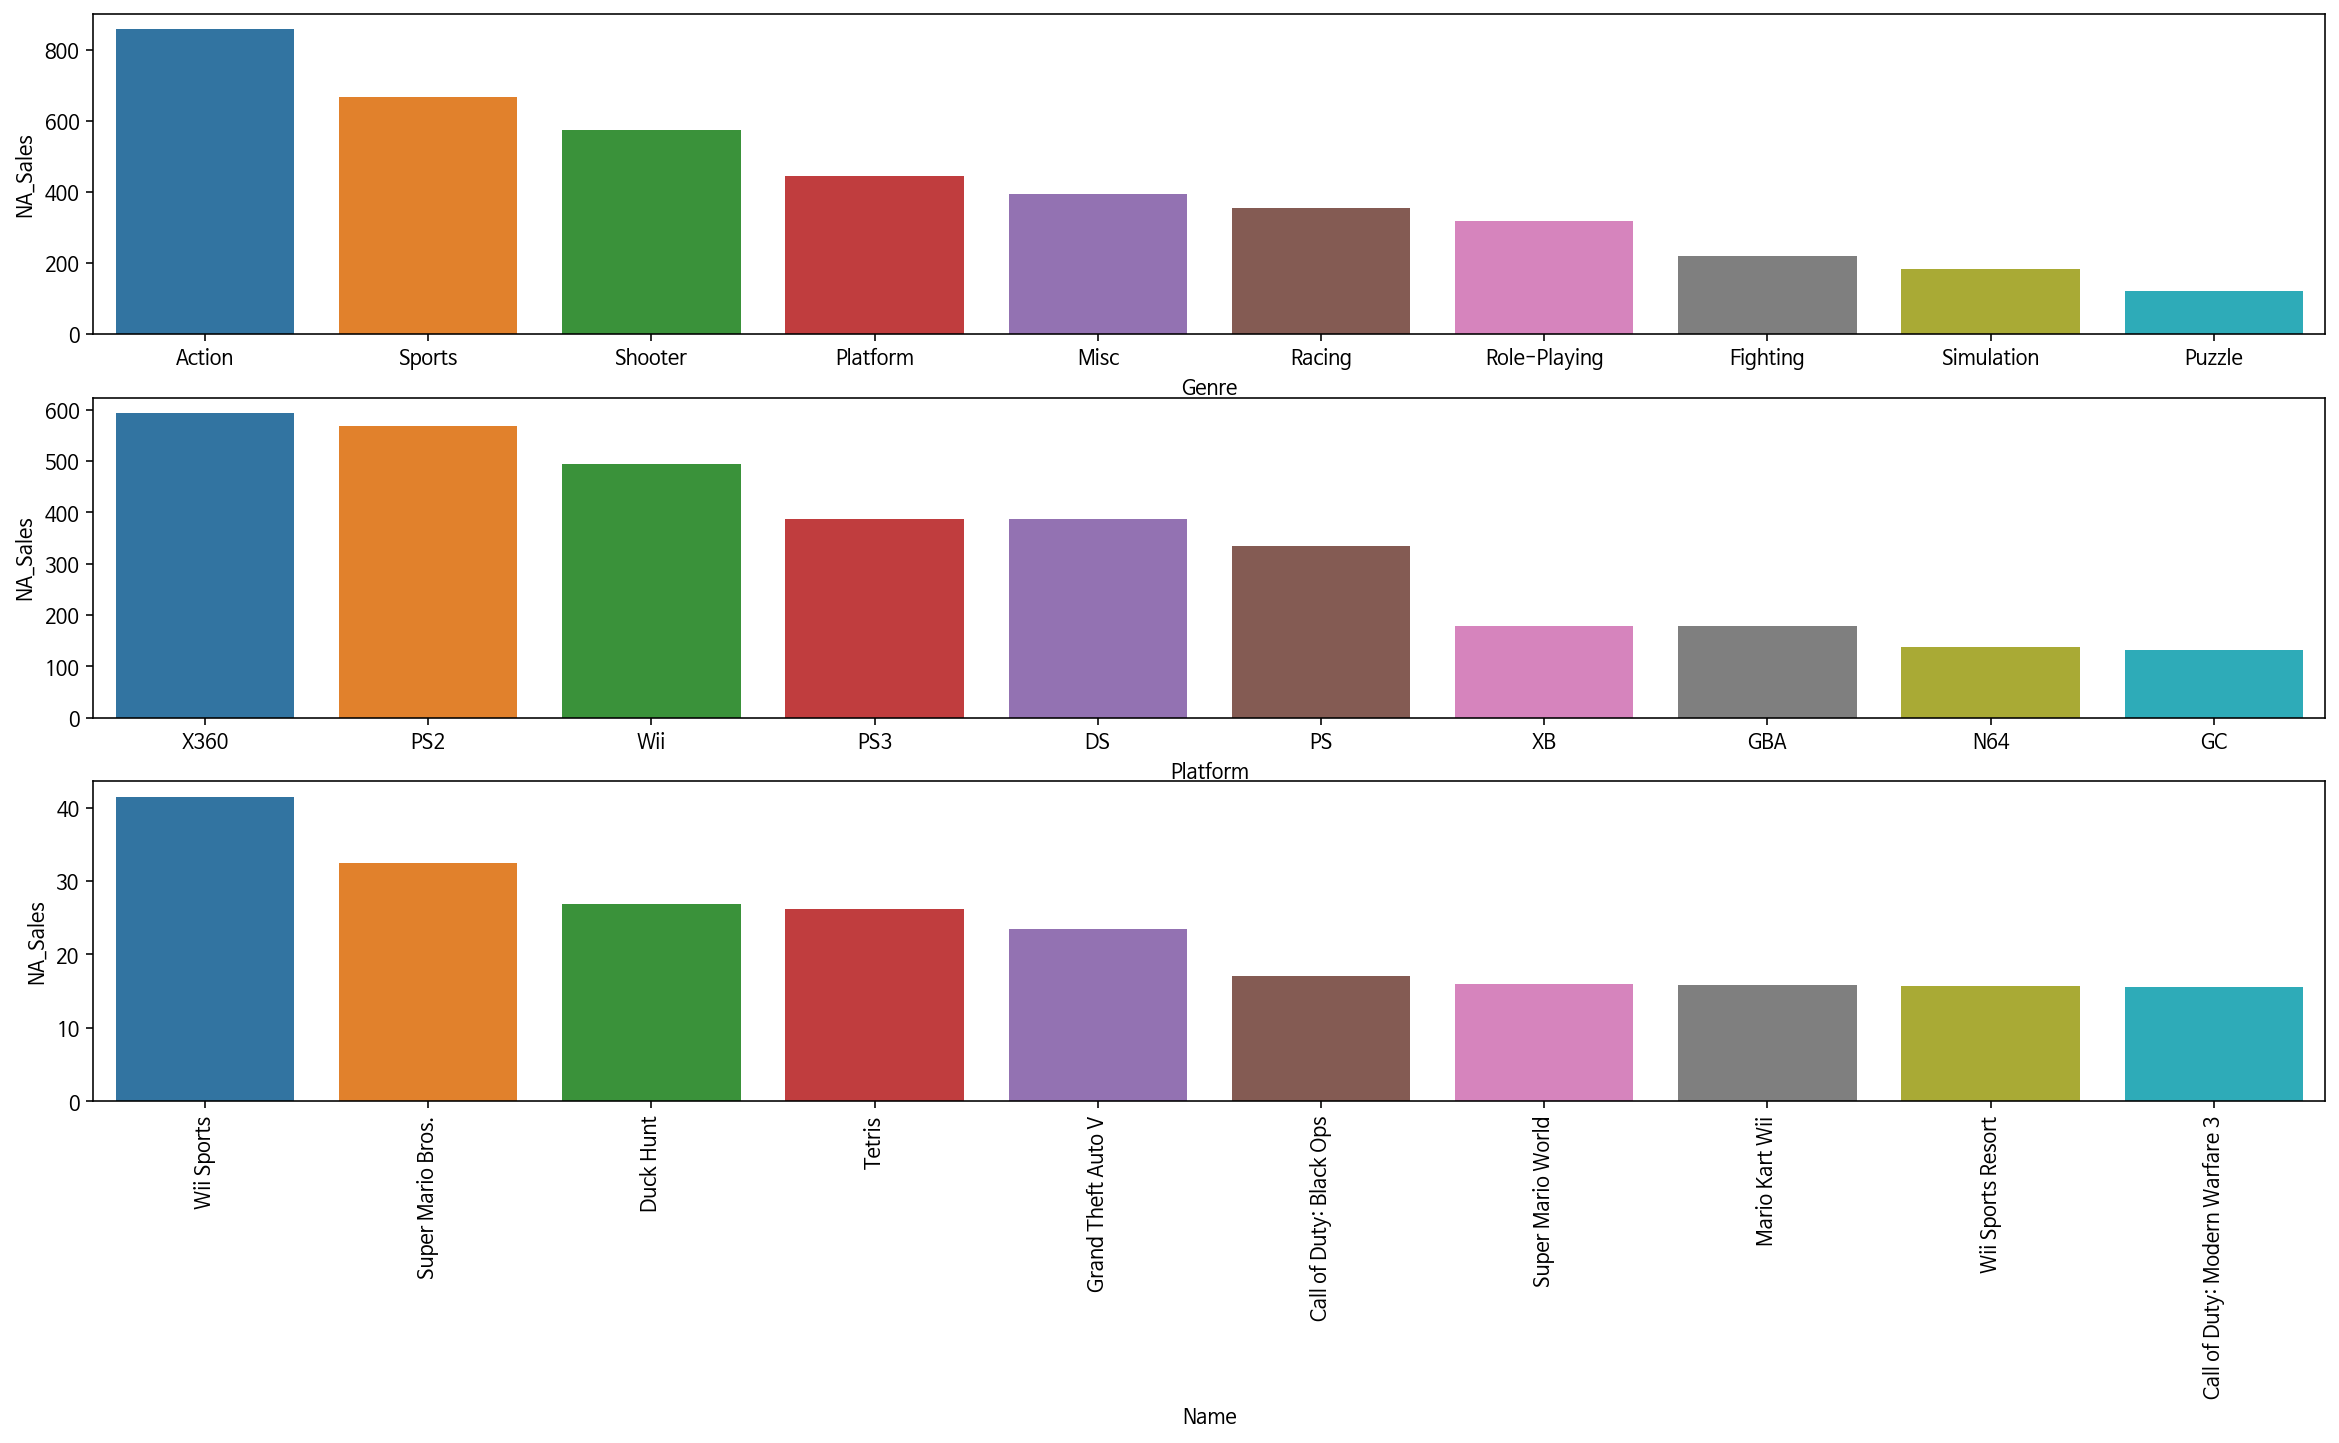

In [34]:
plt.figure(figsize=(20, 10))

na_name = pd.DataFrame(df.groupby('Name')['NA_Sales'].sum().sort_values(ascending=False)[:10]).reset_index()
na_platform = pd.DataFrame(df.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False)[:10]).reset_index()
na_genre = pd.DataFrame(df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)[:10]).reset_index()

plt.title("NA Sales")
plt.subplot(311)
sns.barplot(x='Genre', y='NA_Sales', data=na_genre)

plt.subplot(312)
sns.barplot(x='Platform', y='NA_Sales', data=na_platform)

plt.subplot(313)
sns.barplot(x='Name', y='NA_Sales', data=na_name)
plt.xticks(rotation=90)

plt.show();

**미국에서는 Action, Sport, Shooter 장르에 게임 선호도를 가지고 있다. XBox, PS 관련 플랫폼이 인기가 있다. 전체 매출액을 봤을때는 Wii Sports, Super Mario, Duck Hunt가 가장 많이 팔렸다.**

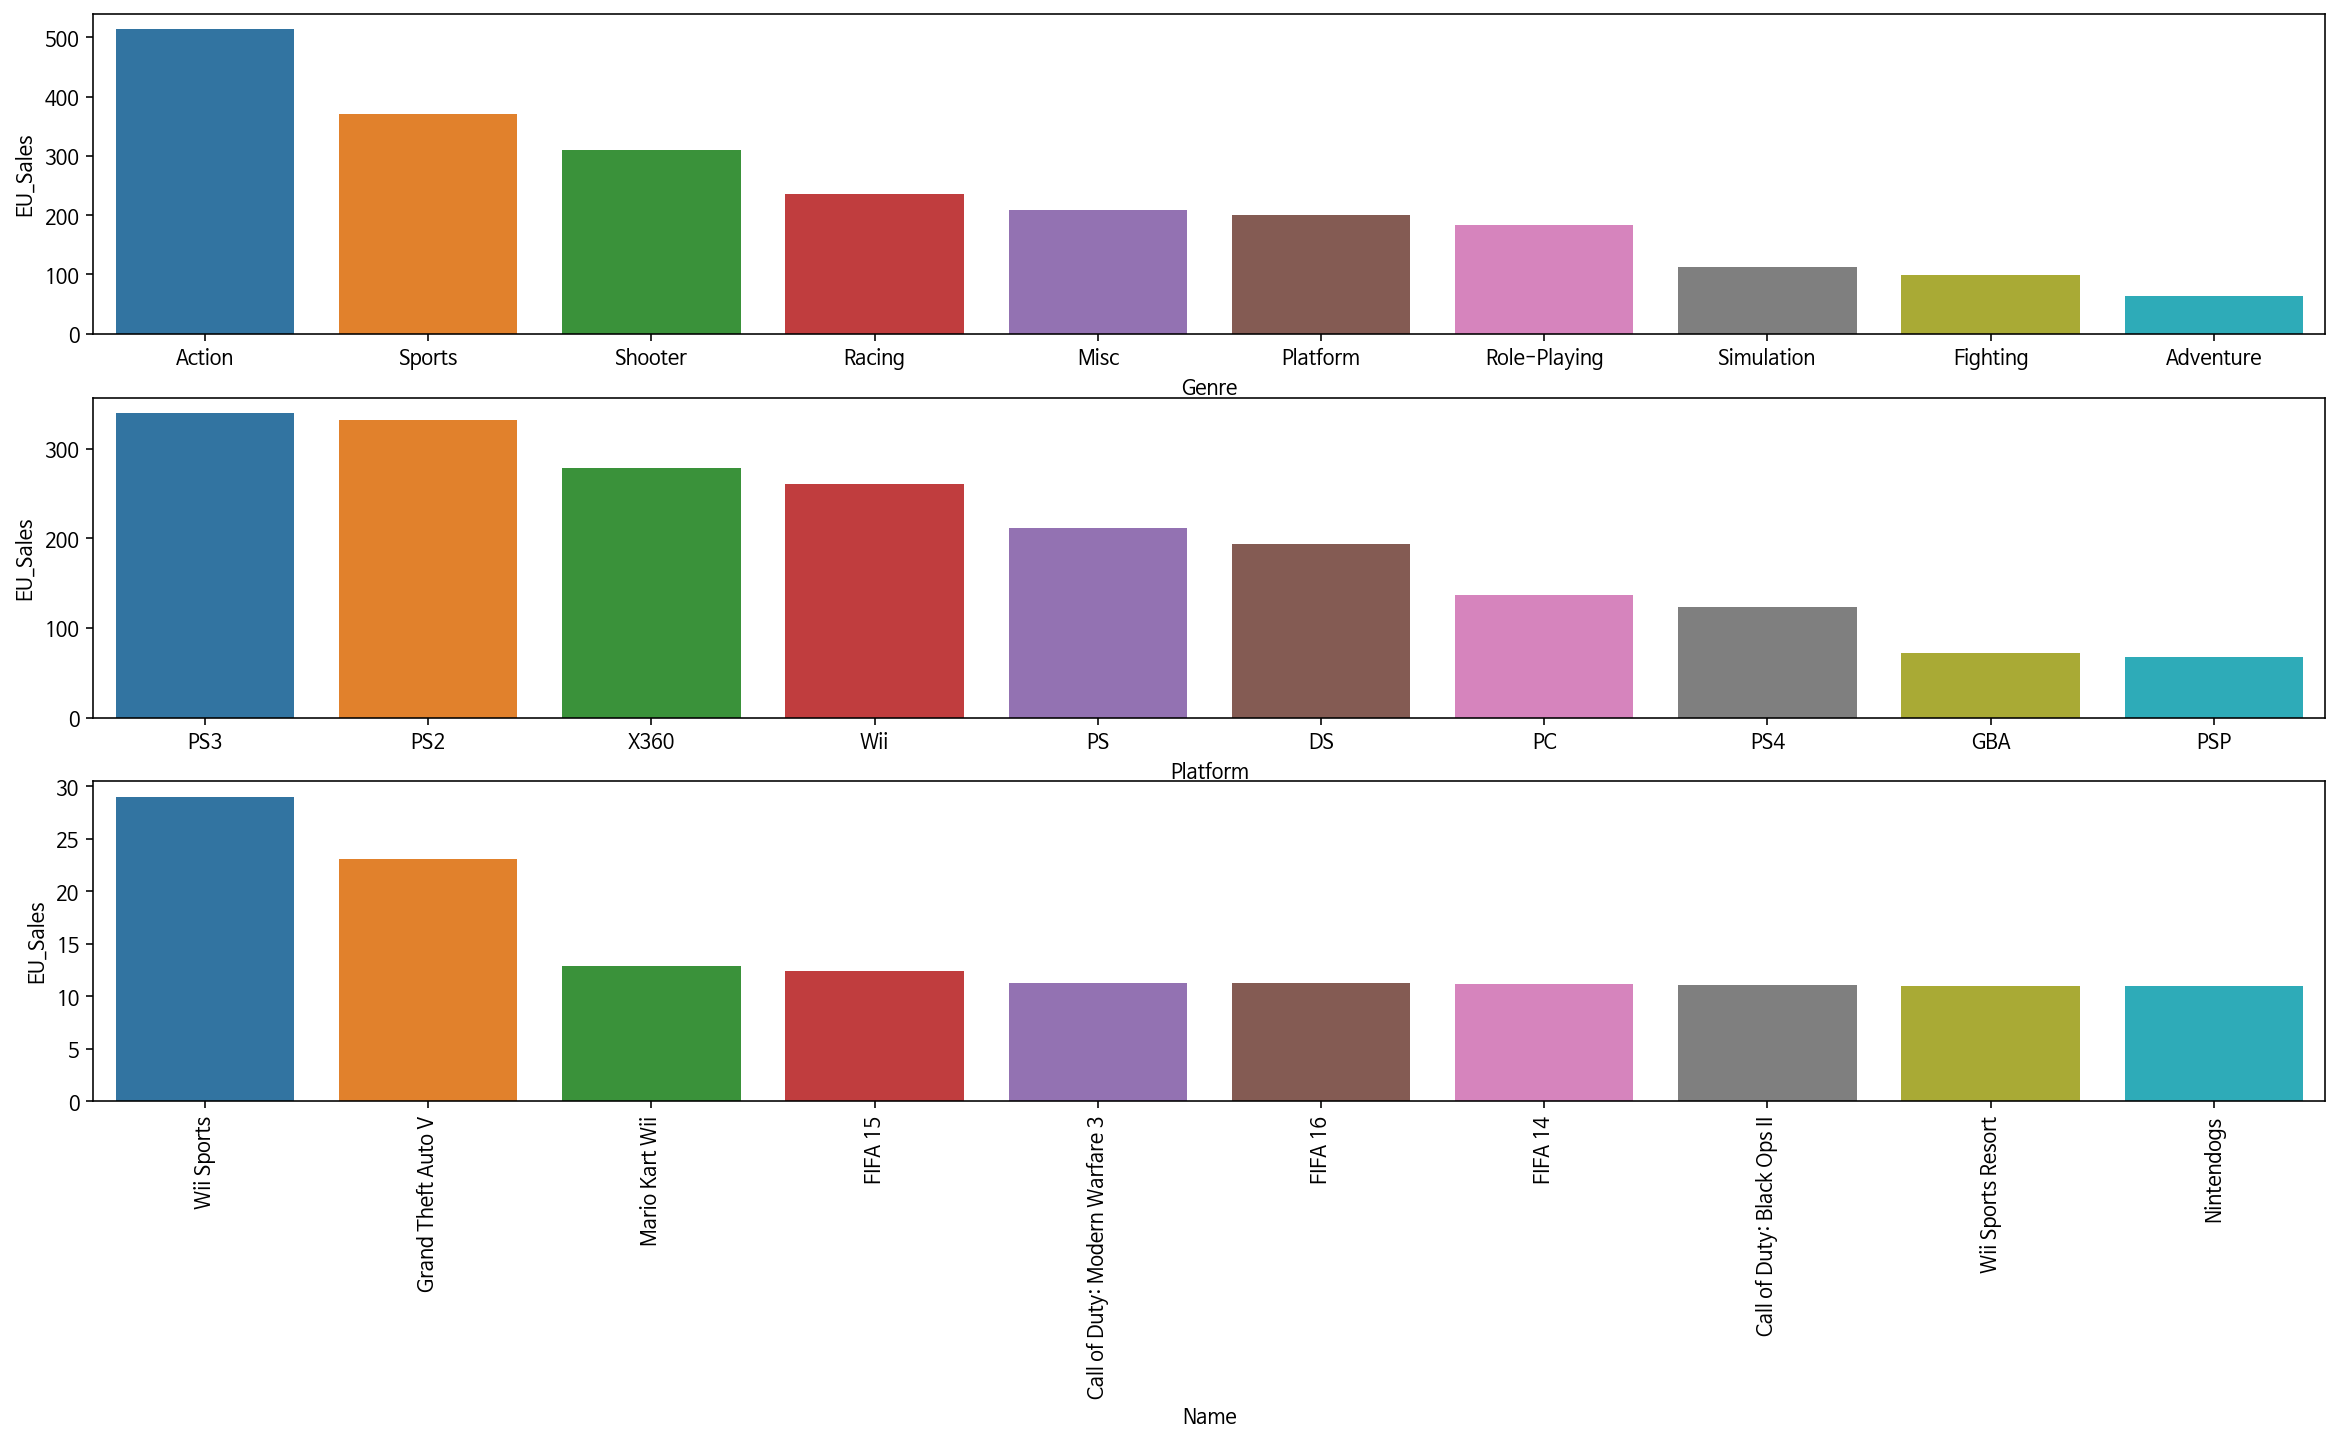

In [35]:
plt.figure(figsize=(20, 10))

eu_name = pd.DataFrame(df.groupby('Name')['EU_Sales'].sum().sort_values(ascending=False)[:10]).reset_index()
eu_platform = pd.DataFrame(df.groupby('Platform')['EU_Sales'].sum().sort_values(ascending=False)[:10]).reset_index()
eu_genre = pd.DataFrame(df.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False)[:10]).reset_index()

plt.title("EU Sales")
plt.subplot(311)
sns.barplot(x='Genre', y='EU_Sales', data=eu_genre)

plt.subplot(312)
sns.barplot(x='Platform', y='EU_Sales', data=eu_platform)

plt.subplot(313)
sns.barplot(x='Name', y='EU_Sales', data=eu_name)
plt.xticks(rotation=90)

plt.show();

**유럽에서는 Action, Sport, Shooter 장르에 게임 선호도를 가지고 있다. PS, XBox 관련 플랫폼이 인기가 있다. 전체 매출액을 봤을때는 Wii Sports, GTA5, Mario Kart wii, FIFA15 순으로 많이 팔렸다.**

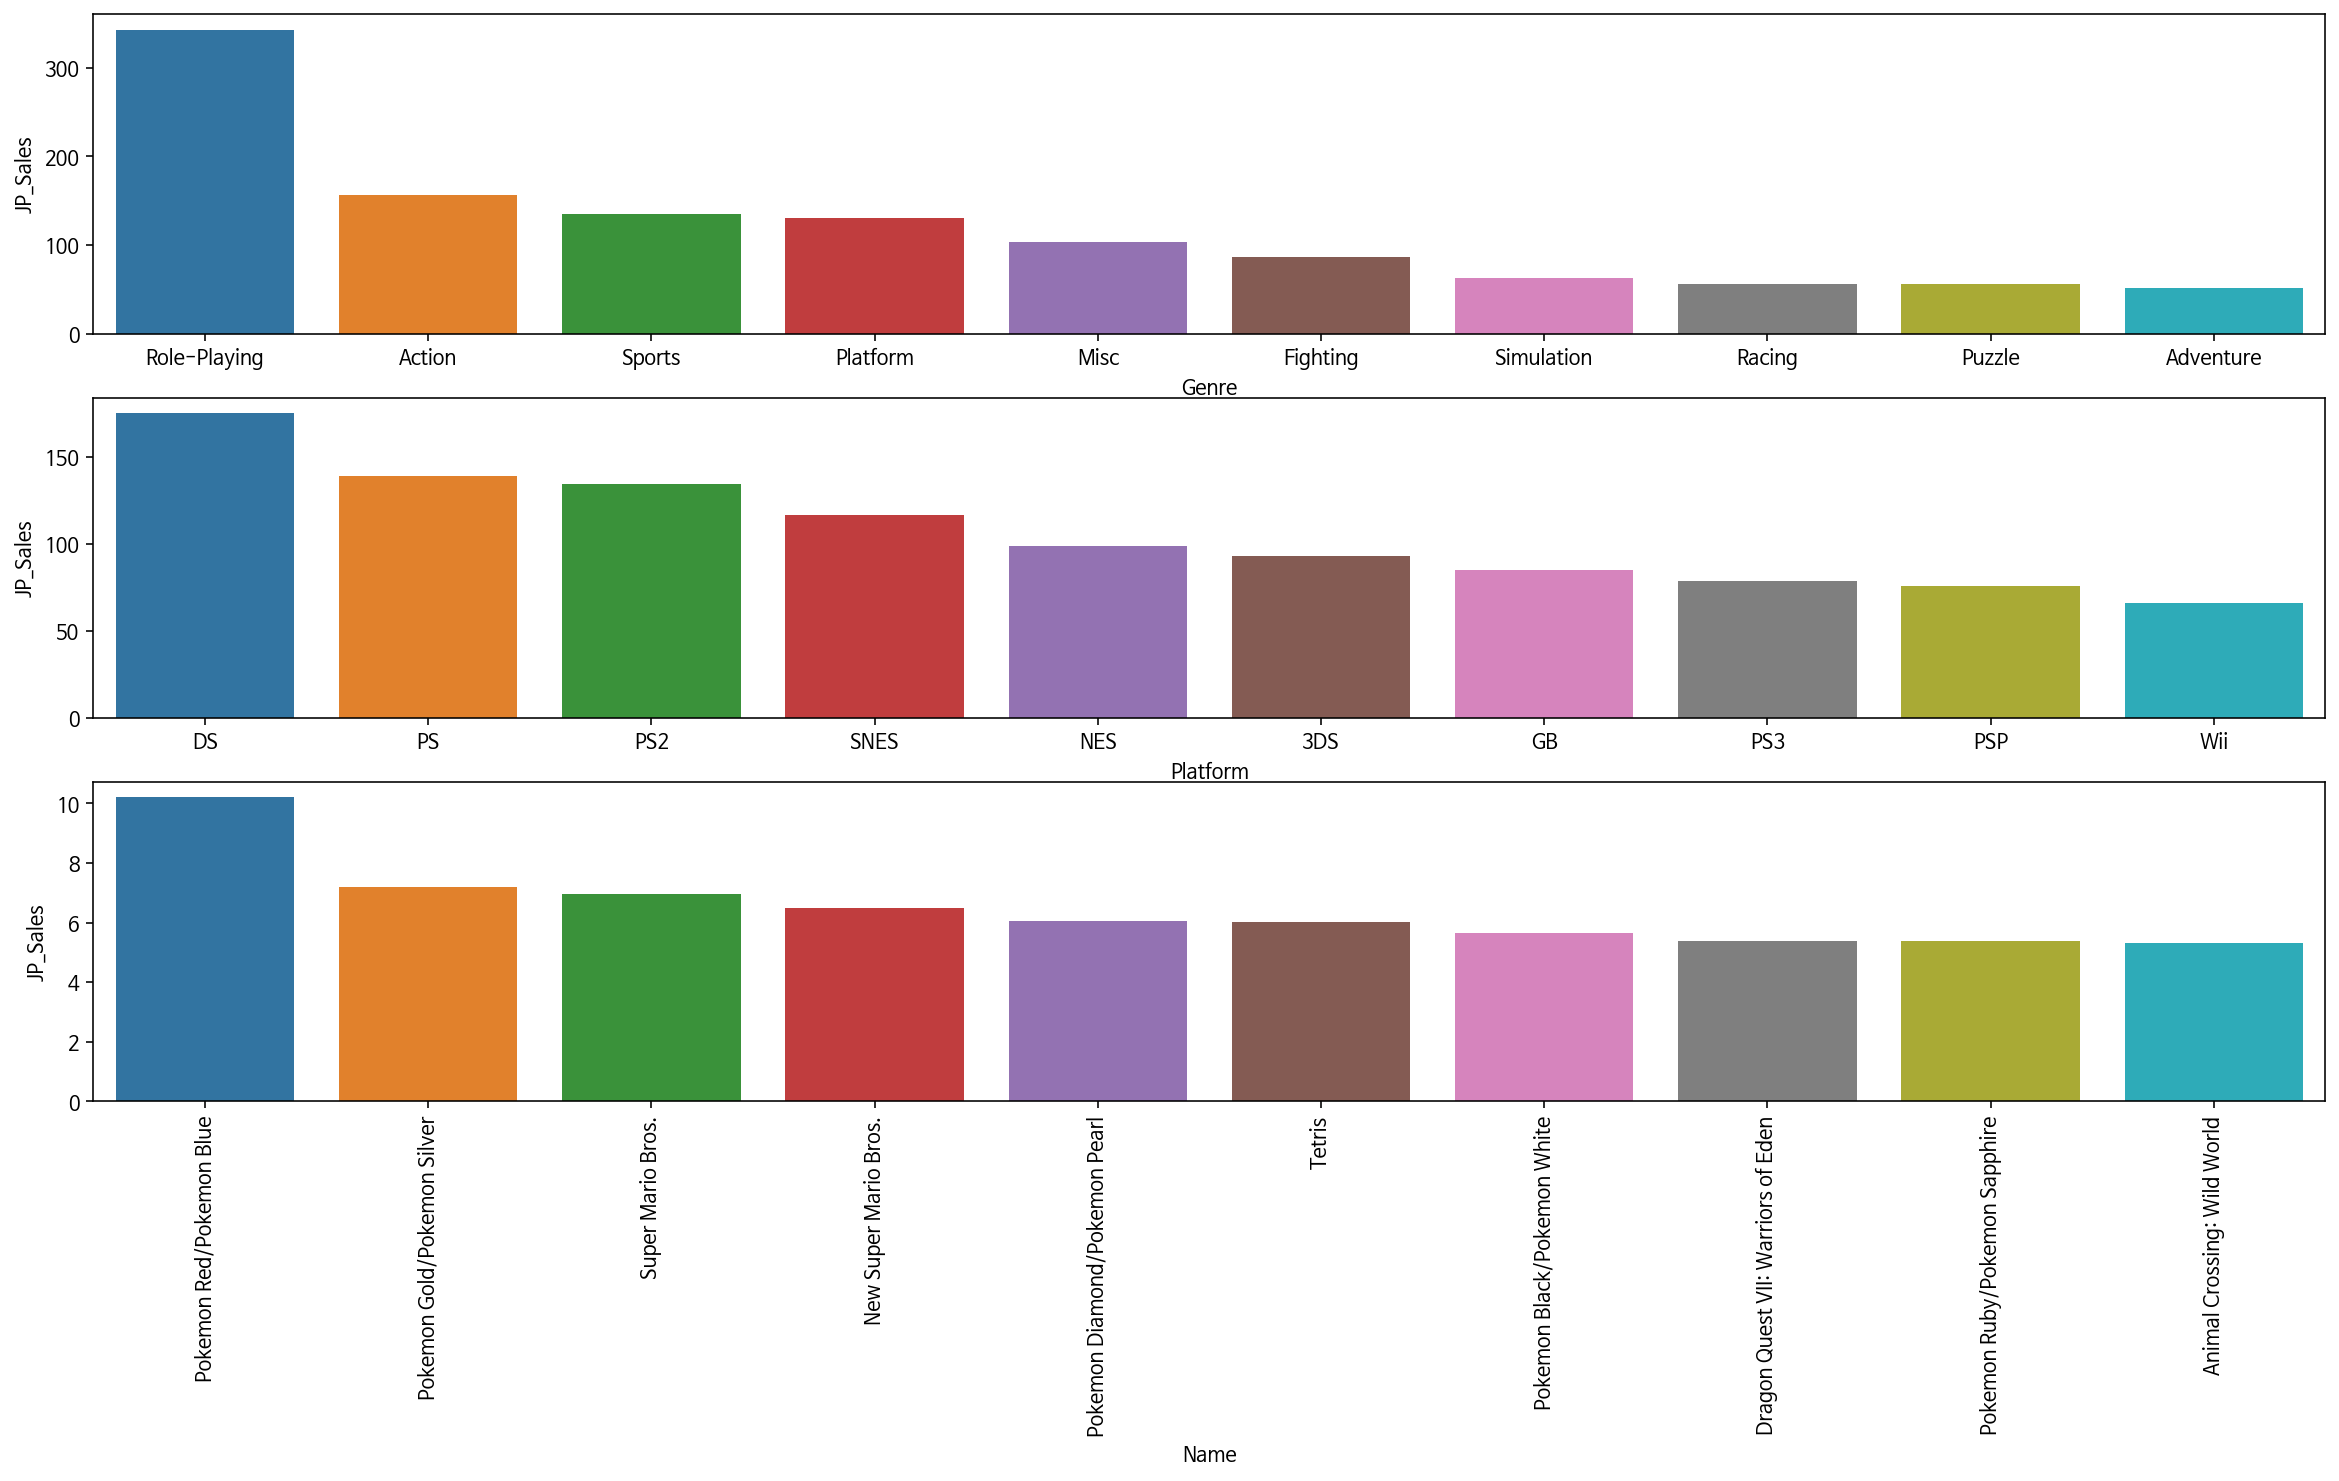

In [36]:
plt.figure(figsize=(20, 10))

jp_name = pd.DataFrame(df.groupby('Name')['JP_Sales'].sum().sort_values(ascending=False)[:10]).reset_index()
jp_platform = pd.DataFrame(df.groupby('Platform')['JP_Sales'].sum().sort_values(ascending=False)[:10]).reset_index()
jp_genre = pd.DataFrame(df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False)[:10]).reset_index()

plt.title("JP Sales")
plt.subplot(311)
sns.barplot(x='Genre', y='JP_Sales', data=jp_genre)

plt.subplot(312)
sns.barplot(x='Platform', y='JP_Sales', data=jp_platform)

plt.subplot(313)
sns.barplot(x='Name', y='JP_Sales', data=jp_name)
plt.xticks(rotation=90)

plt.show();

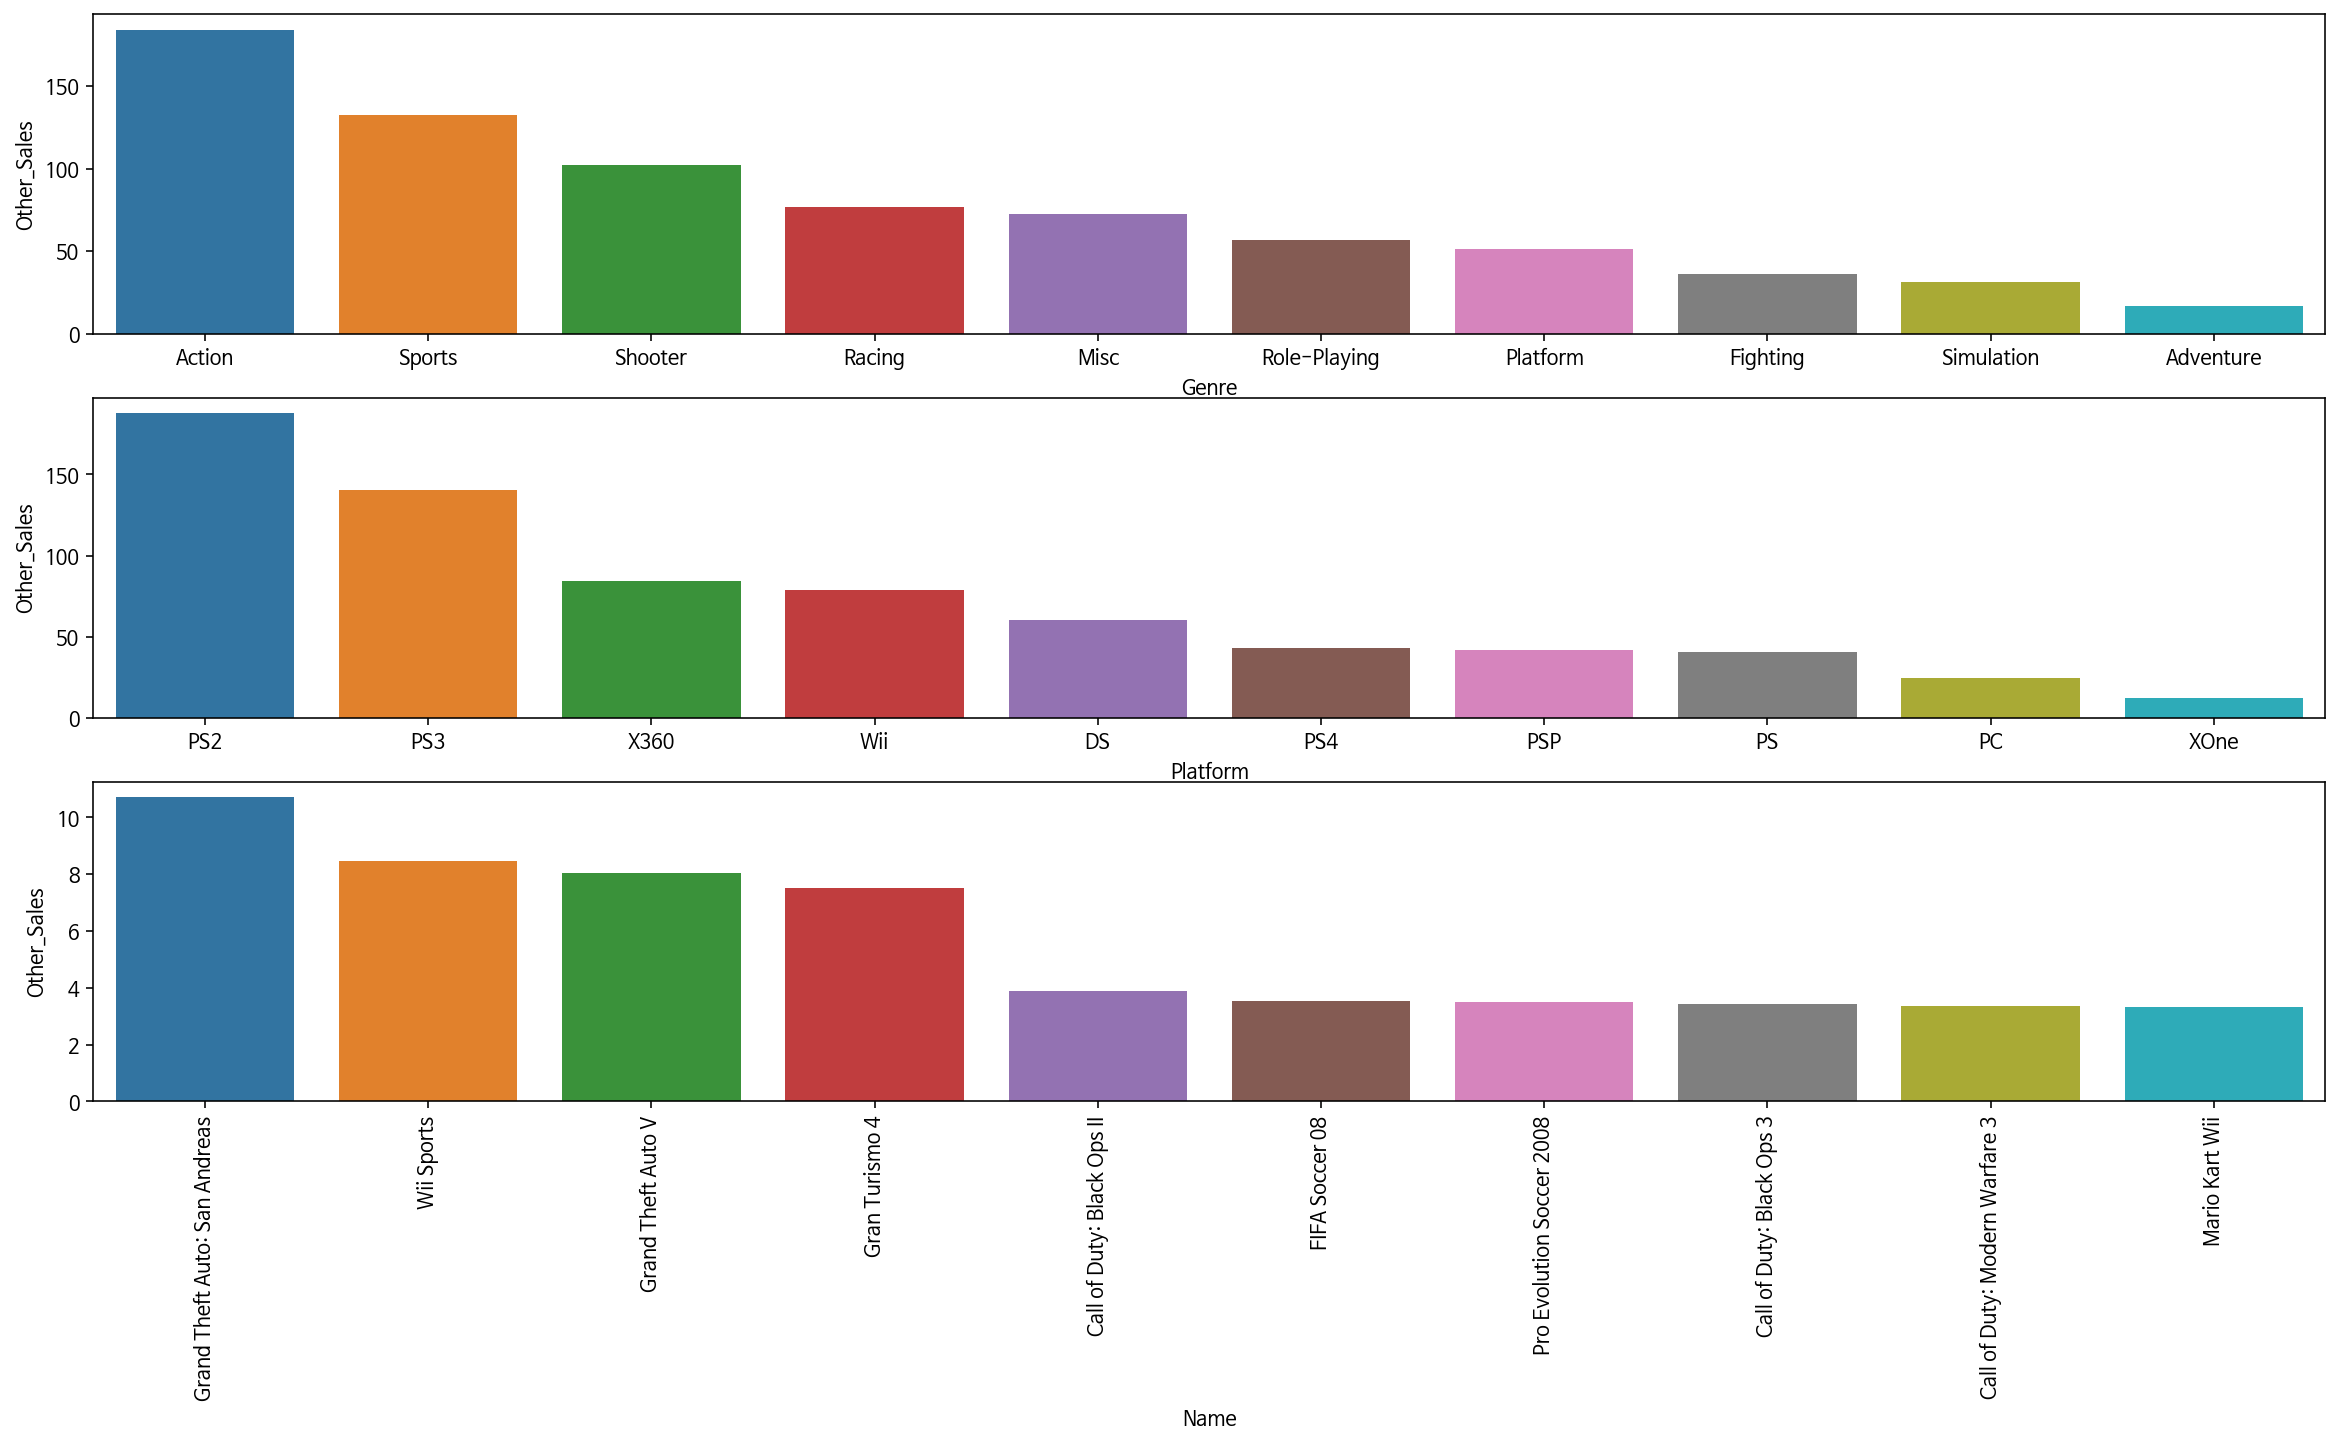

In [37]:
plt.figure(figsize=(20, 10))

other_name = pd.DataFrame(df.groupby('Name')['Other_Sales'].sum().sort_values(ascending=False)[:10]).reset_index()
other_platform = pd.DataFrame(df.groupby('Platform')['Other_Sales'].sum().sort_values(ascending=False)[:10]).reset_index()
other_genre = pd.DataFrame(df.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=False)[:10]).reset_index()

plt.title("Other_Sales")
plt.subplot(311)
sns.barplot(x='Genre', y='Other_Sales', data=other_genre)

plt.subplot(312)
sns.barplot(x='Platform', y='Other_Sales', data=other_platform)

plt.subplot(313)
sns.barplot(x='Name', y='Other_Sales', data=other_name)
plt.xticks(rotation=90)

plt.show();

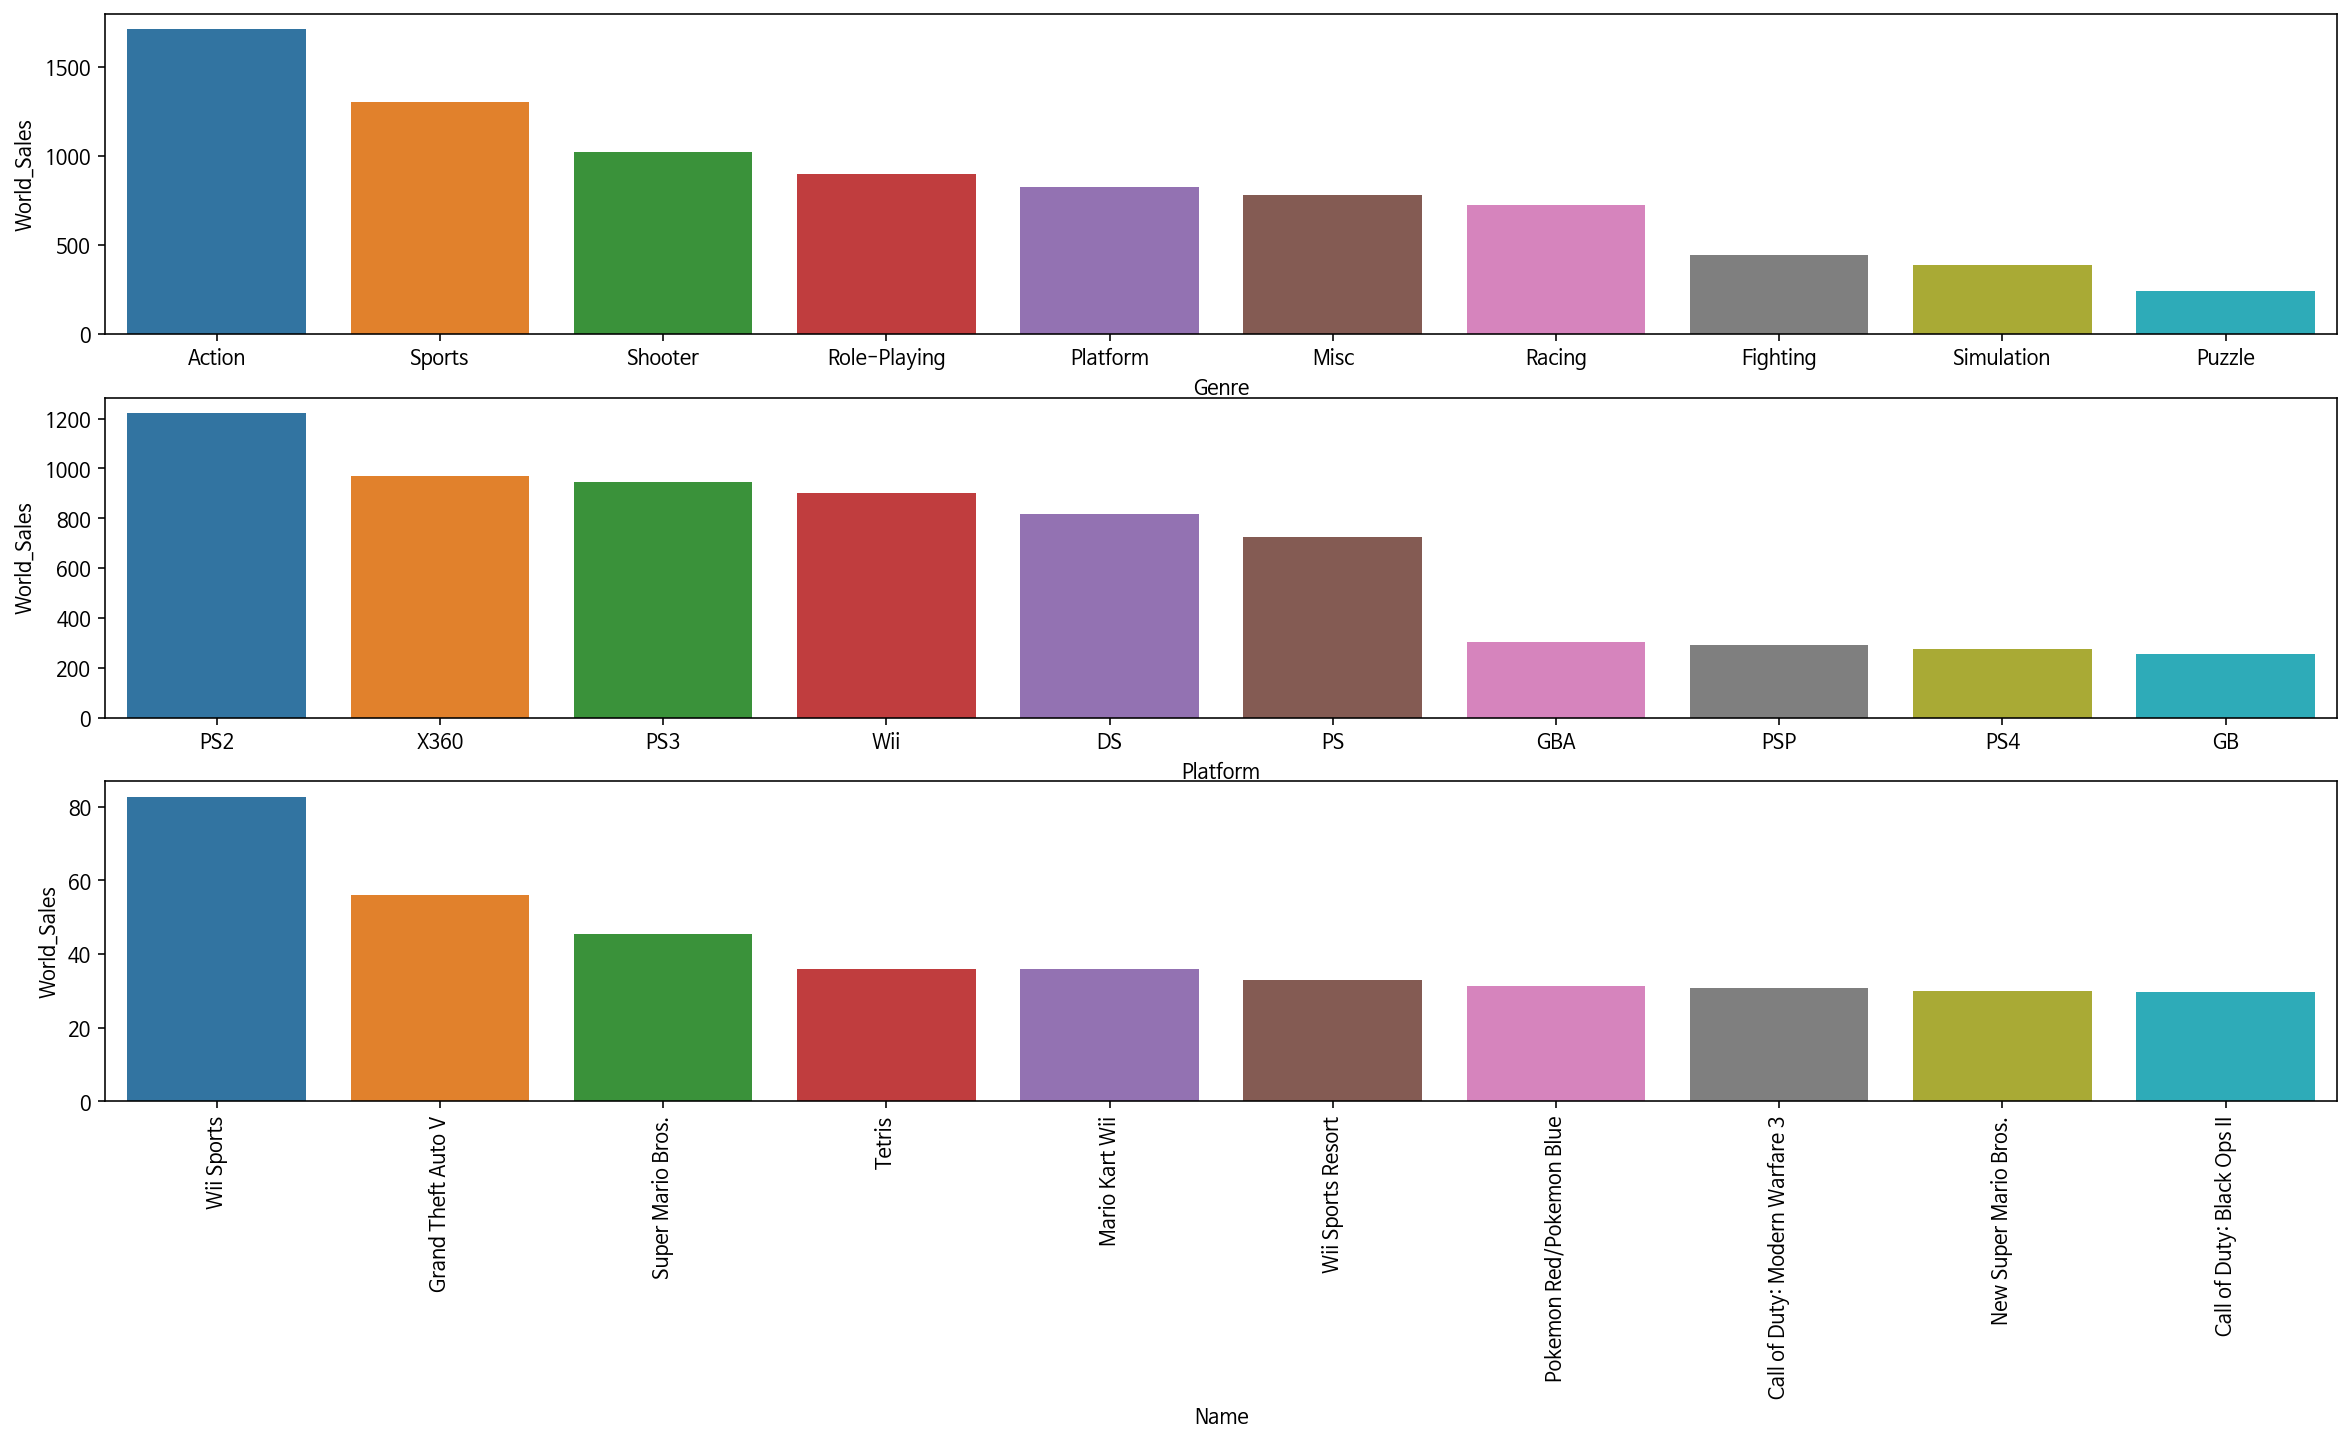

In [38]:
plt.figure(figsize=(20, 10))

wd_name = pd.DataFrame(df.groupby('Name')['World_Sales'].sum().sort_values(ascending=False)[:10]).reset_index()
wd_platform = pd.DataFrame(df.groupby('Platform')['World_Sales'].sum().sort_values(ascending=False)[:10]).reset_index()
wd_genre = pd.DataFrame(df.groupby('Genre')['World_Sales'].sum().sort_values(ascending=False)[:10]).reset_index()

plt.title("World_Sales")
plt.subplot(311)
sns.barplot(x='Genre', y='World_Sales', data=wd_genre)

plt.subplot(312)
sns.barplot(x='Platform', y='World_Sales', data=wd_platform)

plt.subplot(313)
sns.barplot(x='Name', y='World_Sales', data=wd_name)
plt.xticks(rotation=90)

plt.show();

----------

# 결론

각 나라에 따른 타겟팅 설정 

플랫폼, 게임 장르, 매출액을 비교하여 다음 분기 게임 설계

플랫폼 출시 날짜는 최신 플랫폼으로, 출시는 오래됬지만 꾸준히 사랑받는 장르

각 나라별 게임 장르 선호도에 맞추어서 출시


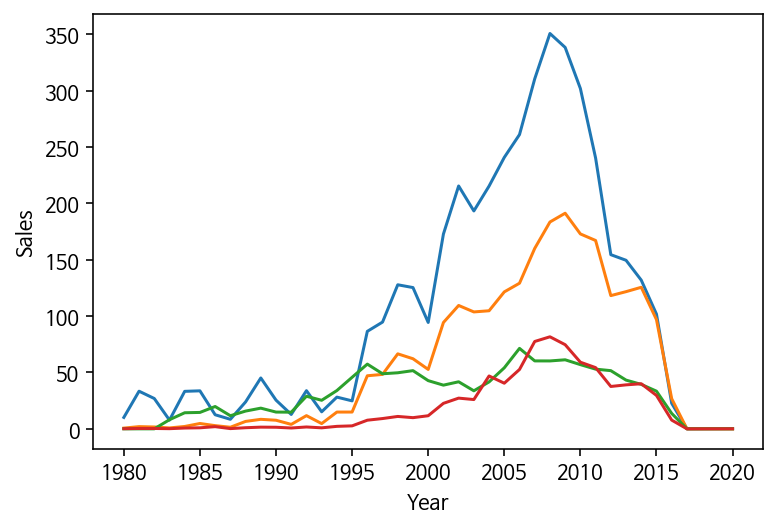

In [39]:
# 나라 별 매출 상승률 
na = df[['NA_Sales','Year']].groupby('Year').sum().sort_index().reset_index()
eu = df[['EU_Sales','Year']].groupby('Year').sum().sort_index().reset_index()
jp = df[['JP_Sales','Year']].groupby('Year').sum().sort_index().reset_index()
other = df[['Other_Sales','Year']].groupby('Year').sum().sort_index().reset_index()

sns.lineplot(x='Year', y='NA_Sales', data=na)
sns.lineplot(x='Year', y='EU_Sales', data=eu)
sns.lineplot(x='Year', y='JP_Sales', data=jp)
sns.lineplot(x='Year', y='Other_Sales', data=other)
plt.ylabel('Sales')
plt.show();

In [40]:
print('전체 판매량에 미국 판매량 : ',df['NA_Sales'].sum() / df['World_Sales'].sum())
print('전체 판매량에 유럽 판매량 : ',df['EU_Sales'].sum() / df['World_Sales'].sum())
print('전체 판매량에 일본 판매량 : ',df['JP_Sales'].sum() / df['World_Sales'].sum())
print('전체 판매량에 다른 나라 판매량 : ',df['Other_Sales'].sum() / df['World_Sales'].sum())

전체 판매량에 미국 판매량 :  0.49193123762902086
전체 판매량에 유럽 판매량 :  0.27338307804239004
전체 판매량에 일본 판매량 :  0.1452125952415489
전체 판매량에 다른 나라 판매량 :  0.08947308908704033


**미국과 유럽에 비디오게임 전체 매출액이 76%를 차지한다. 미국과 유럽을 타겟으로 다음 분기 게임을 설계 할 것이다.**

 장르, 플랫폼에 따른 매출액 변화를 보면 분석한 차트를 보면 미국과 유럽에서는 Action,Sports,Shooter 장르의 Play Station, XBox관련 게임을 선호한다. XBOX의 경우 2013년 이후 매출액이 떨어졌고 PS4 출시로 매출액이 상승 하였다. 다음 분기에는 **Play Station4 관련된 게임을 출시 해야된다.**

In [43]:
df[(df['Platform']=='PS4') & (df['Genre']=='Action')].sort_values('NA_Sales')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,World_Sales
12867,Infamous: First Light,PS4,2014,Action,Sony Computer Entertainment,0.00,0.03,0.00,0.01,0.04
11072,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
11026,Rugby League Live 3,PS4,2015,Action,Tru Blu Entertainment,0.00,0.02,0.00,0.00,0.02
10422,Assassin's Creed Chronicles: China,PS4,2015,Action,Ubisoft,0.00,0.03,0.00,0.01,0.04
14899,Republique,PS4,2016,Action,Nippon Ichi Software,0.00,0.01,0.01,0.00,0.02
...,...,...,...,...,...,...,...,...,...,...
4357,Watch Dogs,PS4,2014,Action,Ubisoft,1.40,1.86,0.11,0.77,4.14
2375,Batman: Arkham Knight,PS4,2015,Action,Warner Bros. Interactive Entertainment,1.49,1.58,0.10,0.61,3.78
13529,The Last of Us,PS4,2014,Action,Sony Computer Entertainment,1.78,1.87,0.07,0.82,4.54
13604,Uncharted: The Nathan Drake Collection,PS4,2015,Action,Sony Computer Entertainment,1.96,1.69,0.08,0.74,4.47


In [44]:
df[(df['Platform']=='PS4') & (df['Genre']=='Action')].sort_values('EU_Sales')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,World_Sales
12632,Dynasty Warriors: Eiketsuden,PS4,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
14958,Ghostbusters (2016),PS4,2016,Action,Activision,0.02,0.00,0.00,0.01,0.03
3858,Aegis of Earth: Protonovus Assault,PS4,2016,Action,PQube,0.02,0.00,0.00,0.00,0.02
4114,Sengoku Basara 4: Sumeragi,PS4,2015,Action,Capcom,0.00,0.00,0.05,0.00,0.05
4253,Toukiden 2,PS4,2016,Action,Tecmo Koei,0.00,0.00,0.08,0.00,0.08
...,...,...,...,...,...,...,...,...,...,...
4357,Watch Dogs,PS4,2014,Action,Ubisoft,1.40,1.86,0.11,0.77,4.14
13529,The Last of Us,PS4,2014,Action,Sony Computer Entertainment,1.78,1.87,0.07,0.82,4.54
5248,Assassin's Creed Syndicate,PS4,2015,Action,Ubisoft,0.80,1.92,0.06,0.50,3.28
9506,Assassin's Creed: Unity,PS4,2014,Action,Ubisoft,1.18,1.96,0.08,0.70,3.92


### **PlayStation4 에 관련된 게임이면서 Action 장르인 설계 해야한다. 가장 인기가 많았던 GTA 시리즈의 후속작이 전세계 매출액에 큰 영향을 미칠 것이라고 예상된다.**